In [5]:
def Print_values(a, b, c):
    # 根据流程图的逻辑结构
    if a > b:
        if b > c:
            # 输出 [a, b, c]
            result = a + b - 10 * c
        else:
            if a > c:
                # 输出 [a, c, b]
                result = a + c - 10 * b
            else:
                # 输出 [c, a, b]
                result = c + a - 10 * b
    else:
        if b > c:
            result = "empty"
        else:
            # 输出 [c, b, a]
            result = c + b - 10 * a

    print(result)
    
Print_values(5, 15, 10)


empty


In [3]:
import math

def F(x):
    if x == 1:
        return 1
    else:
        return F(math.ceil(x / 3)) + 2 * x

def compute_F_list(lst):
    result = []
    for x in lst:
        result.append(F(x))
    return result

numbers = [1, 3, 5, 10, 20]
results = compute_F_list(numbers)

for n, r in zip(numbers, results):
    print(f"F({n}) = {r}")

F(1) = 1
F(3) = 7
F(5) = 15
F(10) = 33
F(20) = 61


In [4]:
def Find_number_of_ways(x, n=10):
    # 创建二维 DP 表，dp[i][j] 表示用 i 个骰子得到和 j 的方法数
    dp = [[0] * (x + 1) for _ in range(n + 1)]
    
    # 初始化：一个骰子时，和为 1~6 的方法都是 1
    for j in range(1, 7):
        if j <= x:
            dp[1][j] = 1

    # 填表
    for i in range(2, n + 1):  # 从第2个骰子到第n个
        for j in range(i, min(6 * i, x) + 1):
            dp[i][j] = sum(dp[i - 1][j - k] for k in range(1, 7) if j - k >= 0)
    
    return dp[n][x]

Number_of_ways = [Find_number_of_ways(x) for x in range(10, 61)]

max_ways = max(Number_of_ways)
x_with_max_ways = 10 + Number_of_ways.index(max_ways)

print("Number_of_ways =", Number_of_ways)
print("x with maximum number of ways =", x_with_max_ways)
print("Maximum number of ways =", max_ways)


Number_of_ways = [1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
x with maximum number of ways = 35
Maximum number of ways = 4395456


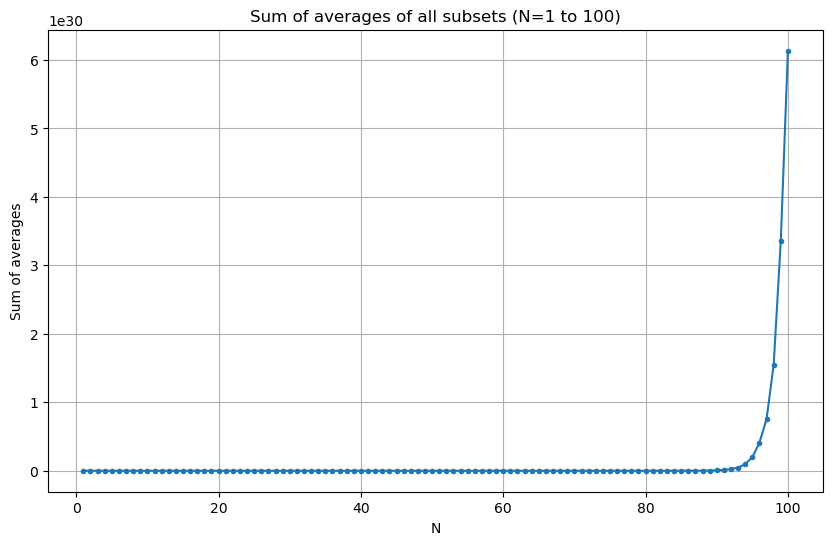

In [15]:
import random
import math
import matplotlib.pyplot as plt

# 4.1: 生成随机整数数组
def Random_integer(N):
    return [random.randint(0, 10) for _ in range(N)]

# 4.2: 高效计算所有子集平均值之和
def Sum_averages(arr):
    N = len(arr)
    total_sum = 0
    for ai in arr:
        contribution = 0
        for k in range(1, N+1):
            contribution += math.comb(N-1, k-1) / k
        total_sum += ai * contribution
    return total_sum

# 4.3: N 从 1 到 100，计算 Sum_averages，并绘图
Total_sum_averages = []

for N in range(1, 101):
    arr = Random_integer(N)
    total = Sum_averages(arr)
    Total_sum_averages.append(total)

# 绘制结果
plt.figure(figsize=(10,6))
plt.plot(range(1, 101), Total_sum_averages, marker='o', markersize=3)
plt.title("Sum of averages of all subsets (N=1 to 100)")
plt.xlabel("N")
plt.ylabel("Sum of averages")
plt.grid(True)
plt.show()


In [ ]:
import random
import numpy as np

# 5.1 创建矩阵函数
def create_matrix(N, M):
    #"""Create a N x M matrix with top-left and bottom-right corners as 1, rest randomly 0 or 1."""
    matrix = np.random.randint(0, 2, size=(N, M))
    matrix[0, 0] = 1
    matrix[N-1, M-1] = 1
    return matrix

# 5.2 统计路径函数
def Count_path(matrix):
    #"""Count total number of paths from top-left to bottom-right with only right or down moves."""
    N, M = matrix.shape
    # dp[i][j] 表示到达 (i, j) 的路径数
    dp = np.zeros((N, M), dtype=int)
    
    # 初始化起点
    if matrix[0, 0] == 1:
        dp[0, 0] = 1
    
    # 填充第一列
    for i in range(1, N):
        if matrix[i, 0] == 1:
            dp[i, 0] = dp[i-1, 0]
    
    # 填充第一行
    for j in range(1, M):
        if matrix[0, j] == 1:
            dp[0, j] = dp[0, j-1]
    
    # 填充其余位置
    for i in range(1, N):
        for j in range(1, M):
            if matrix[i, j] == 1:
                dp[i, j] = dp[i-1, j] + dp[i, j-1]
    
    return dp[N-1, M-1]

# 5.3 运行实验并求平均路径数
def experiment(N, M, runs=1000):
    total_paths = 0 
    for _ in range(runs):
        mat = create_matrix(N, M)
        total_paths += Count_path(mat)
    mean_paths = total_paths / runs
    return mean_paths

# 设置 N = 10, M = 8，运行 1000 次实验
N = 10
M = 8
mean_total_paths = experiment(N, M, 1000)
print(f"Mean total number of paths over 1000 runs: {mean_total_paths}")


Mean total number of paths over 1000 runs: 0.423
